In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn import datasets, metrics, model_selection
from sklearn.calibration import calibration_curve, CalibrationDisplay

Data Set : https://www.kaggle.com/rikdifos/credit-card-approval-prediction

In [2]:
df = pd.read_csv('application_record.csv',header=0)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
label = pd.read_csv('credit_record.csv',header=0)
label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
label['STATUS'], labels = pd.factorize(label['STATUS'])

In [5]:
labels

Index(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype='object')

In [6]:
label_clean = label[label['STATUS'] != 0]
label_clean

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
5,5001712,-1,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [8]:
label_clean = label[label['STATUS'] != 0]

In [9]:
label_clean['STATUS'][label['STATUS'] > 2] = 100

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
label_clean['STATUS'][label['STATUS'] <= 2] = 0

In [11]:
label_clean['STATUS'][label['STATUS'] <= 2] = 0

In [12]:
label_clean.groupby('STATUS')['STATUS'].count()

STATUS
0      825151
100     14194
Name: STATUS, dtype: int64

In [16]:
label_clean.groupby('ID').mean() #get average income for each ID 

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.000000
5001712,-9.000000,0.000000
5001717,-10.500000,0.000000
5001718,-18.724138,6.896552
5001719,-21.000000,0.000000
...,...,...
5150480,-36.500000,0.000000
5150482,-19.500000,0.000000
5150484,-6.000000,0.000000


In [17]:
label_grouped = label_clean.groupby('ID').mean()

In [19]:
label_grouped['STATUS'][label_grouped['STATUS'] > 0] = 1
label_grouped['STATUS'][label_grouped['STATUS'] <= 0] = 0

In [20]:
label_grouped.groupby('STATUS')['STATUS'].count()

STATUS
0.0    36099
1.0     5350
Name: STATUS, dtype: int64

In [21]:
label_grouped

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,1.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [40]:
df_clean = df.dropna(axis = 0)
df_clean = df_clean.drop(['DAYS_BIRTH', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_MOBIL','CODE_GENDER'], axis = 1)

In [50]:
df_clean.isnull().any()
label_grouped.isnull().any()

MONTHS_BALANCE    False
STATUS            False
dtype: bool

In [55]:
df_clean.dtypes
label_grouped.dtypes

MONTHS_BALANCE    float64
STATUS            float64
dtype: object

In [56]:
factor_cols = ['FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'FLAG_OWN_REALTY','NAME_EDUCATION_TYPE']
for i in factor_cols: 
    df_clean[i] = pd.factorize(df_clean[i])[0]

In [57]:
df_clean.to_csv('processed_application_records.csv', index = False)

In [58]:
label_clean.to_csv('processed_credit_records.csv', index = False)

In [59]:
final_df = pd.merge(df_clean, label_grouped, left_on='ID', right_on='ID', how='inner').drop("ID", axis =1)
final_df

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,0,0,0,112500.0,0,0,0,0,-1134,0,2.0,-9.571429,0.0
1,1,0,0,270000.0,1,0,1,0,-3051,1,1.0,-1.000000,0.0
2,1,0,0,270000.0,1,0,1,0,-3051,1,1.0,-10.761905,0.0
3,1,0,0,270000.0,1,0,1,0,-3051,1,1.0,-16.484848,0.0
4,0,0,0,270000.0,0,1,0,0,-769,2,2.0,-2.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22732,0,0,0,315000.0,0,0,0,0,-2420,4,2.0,-2.000000,1.0
22733,1,0,0,157500.0,1,1,0,0,-1325,12,2.0,-11.500000,1.0
22734,1,0,0,157500.0,4,1,0,0,-1325,12,2.0,-16.000000,1.0
22735,1,0,0,283500.0,0,0,0,0,-655,1,2.0,-4.500000,1.0


# Logistic Regression Model

In [31]:
X = final_df.drop(["STATUS"], axis = 1)
y = final_df["STATUS"]

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8654353562005277

In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
score = model_selection.cross_val_score(clf, X, y, cv=kfold)
score

array([0.86587511, 0.8649956 , 0.86191733, 0.86455585, 0.8707124 ,
       0.85971856, 0.86191733, 0.86185658, 0.85877695, 0.87109547])

/home/shkumar/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/shkumar/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


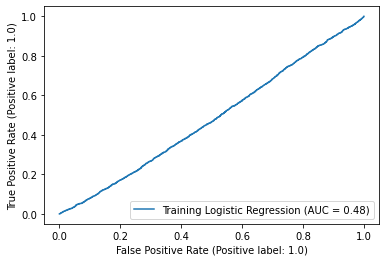

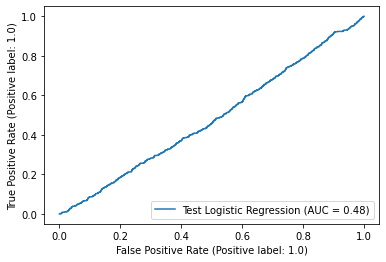

In [34]:
metrics.plot_roc_curve(clf, X_train, y_train, name="Training Logistic Regression") 
metrics.plot_roc_curve(clf, X_test, y_test, name="Test Logistic Regression") 
plt.show()

In [35]:

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X.values, y)
print(skf)  
StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X.values, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [11250 11251 11252 ... 22734 22735 22736] TEST: [    0     1     2 ... 12177 12178 12201]
TRAIN: [    0     1     2 ... 12177 12178 12201] TEST: [11250 11251 11252 ... 22734 22735 22736]


In [36]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8641801548205489

/home/shkumar/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/shkumar/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


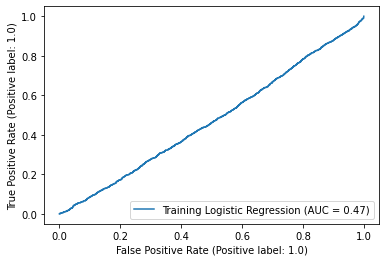

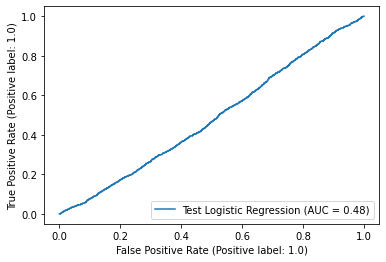

In [37]:
metrics.plot_roc_curve(clf, X_train, y_train, name="Training Logistic Regression") 
metrics.plot_roc_curve(clf, X_test, y_test, name="Test Logistic Regression") 
plt.show()

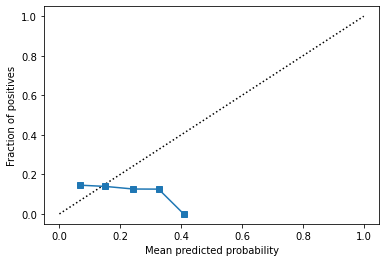

In [38]:
from sklearn.calibration import calibration_curve, CalibrationDisplay
y_prob = clf.predict_proba(X_train)[:, 1]
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()